# 1) Imports

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from yellowbrick.cluster import silhouette_visualizer
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

warnings.filterwarnings("ignore")

# 2) Coleta dos Dados

In [23]:
df = pd.read_csv(r'../Dados/Tabela_final/tabela_final.csv')
df

IBGE7  UF                  NOME  LATITUDE  LONGITUDE  DIST_EF_PUB   
0     2700300  AL             ARAPIRACA  -9.75487   -36.6615    28.190028  \
1     2700706  AL               BATALHA  -9.67420   -37.1330    30.940427   
2     2700904  AL            BELO MONTE  -9.82272   -37.2770    34.584857   
3     2701209  AL           CACIMBINHAS  -9.40121   -36.9911    39.071078   
4     2701605  AL                CANAPI  -9.11932   -37.5967    31.912620   
...       ...  ..                   ...       ...        ...          ...   
1256  2806008  SE          RIBEIRÓPOLIS -10.53570   -37.4380    33.124036   
1257  2807006  SE  SÃO MIGUEL DO ALEIXO -10.38470   -37.3836    31.585497   
1258  2807105  SE            SIMÃO DIAS -10.73870   -37.8097    35.961743   
1259  2807303  SE                 TELHA -10.20640   -36.8818    29.181166   
1260  2807402  SE        TOBIAS BARRETO -11.17980   -37.9995    39.672877   

      DIST_EM_PUB   IDEB_AI   IDEB_AF  DOCSUP_EF_PUB  ...  T_ANALF15M   
0       42.715813  4.682072  3.682635          54.40  ...       22.45  \
1       36.601658  4.488950  3.591572          12.62  ...       30.84   
2       53.005007  4.091777  3.176668          27.12  ...       38.11   
3       42.736296  4.085816  3.310474          49.04  ...       40.61   
4       36.839799  4.673732  3.635387          20.84  ...       40.35   
...           ...       ...       ...            ...  ...         ...   
1256    39.388836  4.178352  3.548260          64.68  ...       28.50   
1257    47.837042  3.932061  3.191697          62.08  ...       33.54   
1258    43.788264  4.292358  3.462631          61.38  ...       26.78   
1259    46.235068  4.399357  3.537064          45.66  ...       27.33   
1260    48.507979  4.328028  3.387450          52.72  ...       28.34   

      T_ANALF18A24  T_ANALF18M  T_ANALF25A29  T_ANALF25M  QUAL_MED_AGUA   
0             6.27       24.10         11.76       28.61      62.439167  \
1             8.85       33.44         20.53       40.54      65.300843   
2            12.42       41.81         30.29       49.99      65.300843   
3            13.56       43.81         30.14       51.12      65.300843   
4            15.27       44.16         28.31       51.97      66.893107   
...            ...         ...           ...         ...            ...   
1256          6.08       30.60         11.60       36.26      64.911294   
1257          7.79       37.03         18.32       44.72      64.911294   
1258          7.36       28.90         14.39       34.16      65.088090   
1259          5.38       29.62         14.00       35.41      64.553680   
1260          9.03       30.67         16.14       36.04      31.901713   

      DIST_CORPO_AGUA  TRANSPORT_COST  TOT_ESC_POR_POP  TOT_MAT_POR_POP  
0           42.035186    24042.166072         0.000433         0.245423  
1           24.642419    24257.110578         0.001200         0.384829  
2            3.297594    24226.863743         0.002235         0.298063  
3           58.541833    24358.206538         0.001102         0.419781  
4           68.942666    24734.221802         0.002032         0.366838  
...               ...             ...              ...              ...  
1256         1.388835    23891.778664         0.000692         0.211261  
1257        16.508752    23954.902605         0.002280         0.196098  
1258         2.685846    23918.838452         0.001108         0.254938  
1259         4.298665    23869.921712         0.001539         0.222838  
1260         1.505902    23749.773314         0.000723         0.235066  

[1261 rows x 63 columns]

# 2) Análise Exploratória

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IBGE7                1261 non-null   int64  
 1   UF                   1261 non-null   object 
 2   NOME                 1261 non-null   object 
 3   LATITUDE             1261 non-null   float64
 4   LONGITUDE            1261 non-null   float64
 5   DIST_EF_PUB          1261 non-null   float64
 6   DIST_EM_PUB          1261 non-null   float64
 7   IDEB_AI              1261 non-null   float64
 8   IDEB_AF              1261 non-null   float64
 9   DOCSUP_EF_PUB        1261 non-null   float64
 10  DOCSUP_EM_PUB        1261 non-null   float64
 11  TXNASC7C             1261 non-null   float64
 12  TXNBAIXOP            1261 non-null   float64
 13  PINTERSAP            1261 non-null   float64
 14  PINTERDRSAI          1261 non-null   float64
 15  REN_PIBPC_D          1261 non-null   f

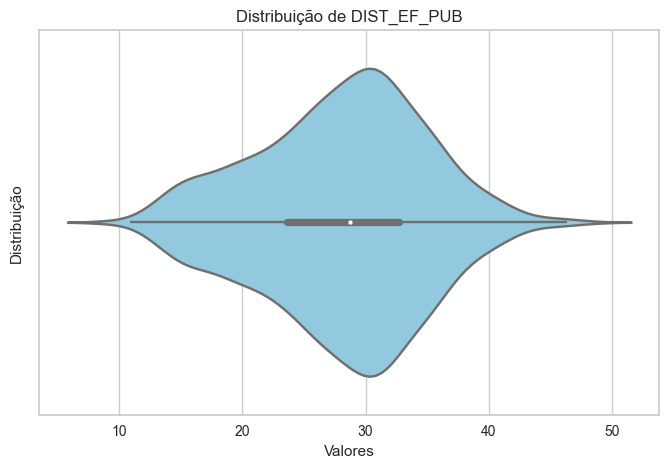

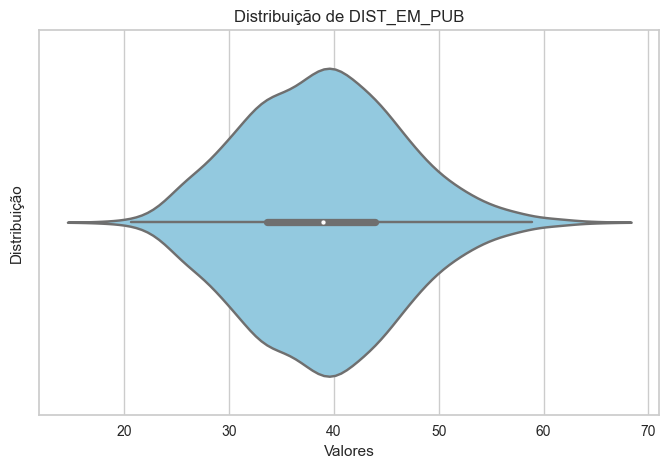

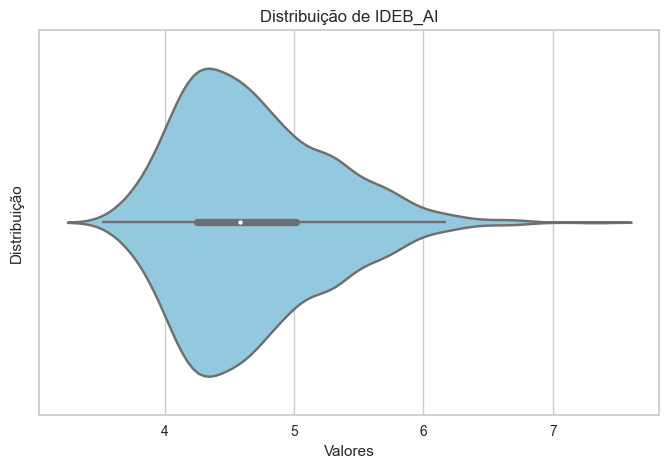

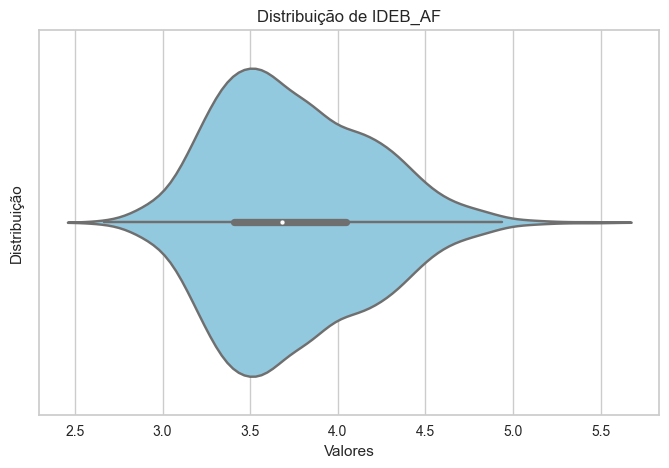

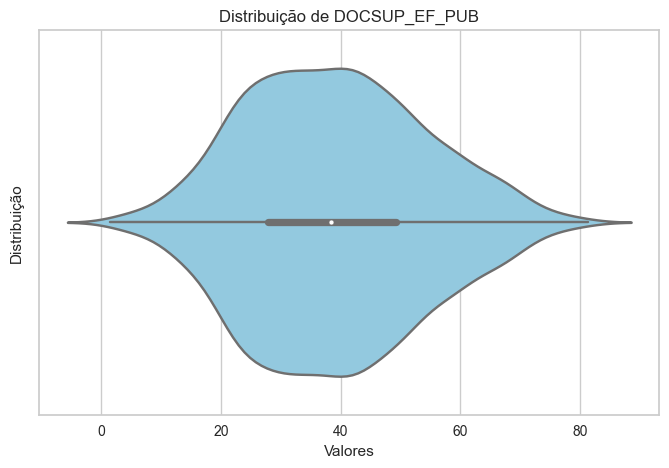

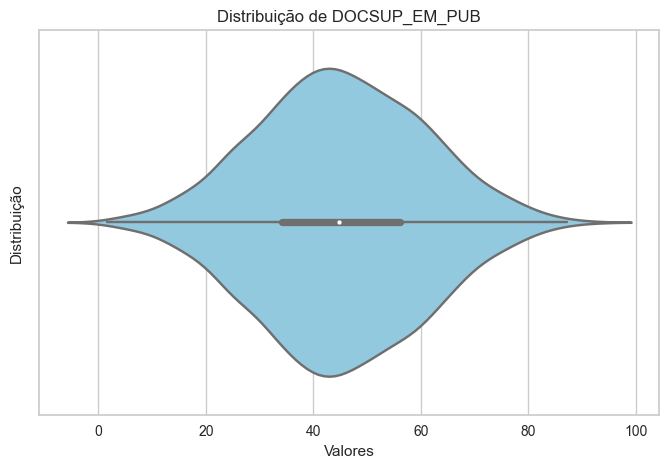

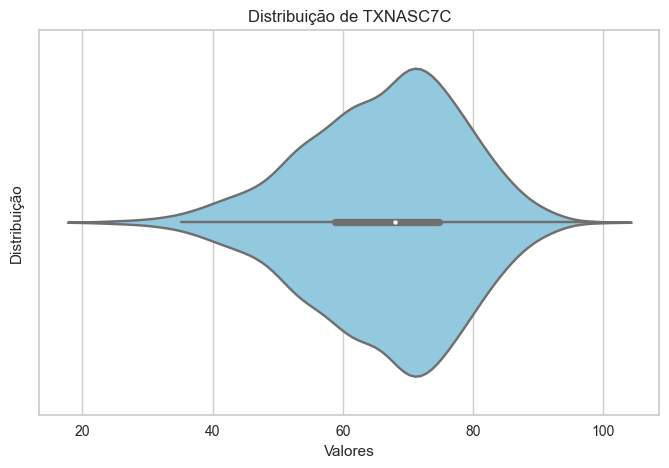

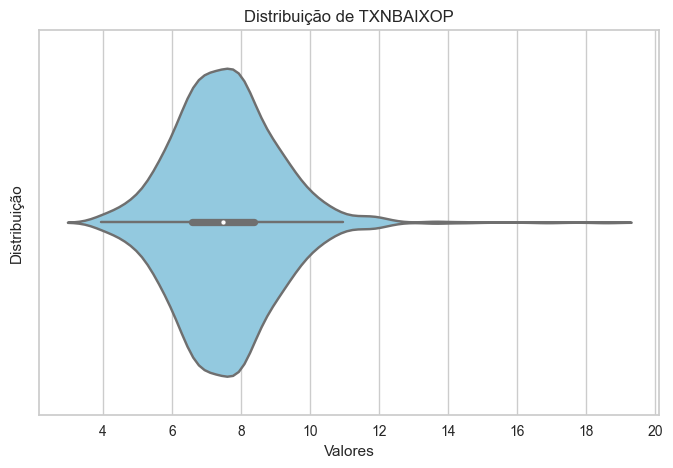

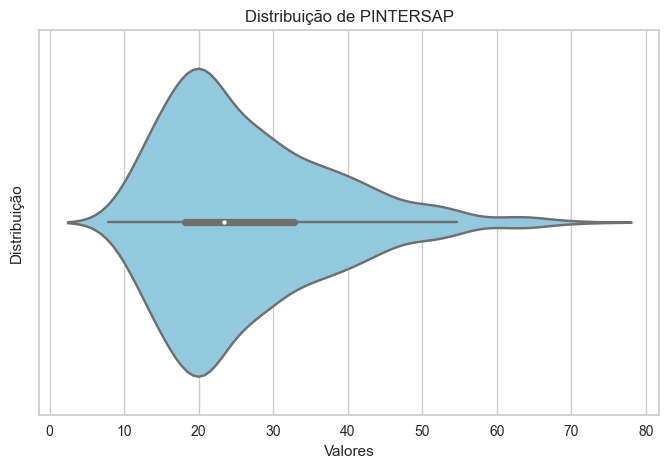

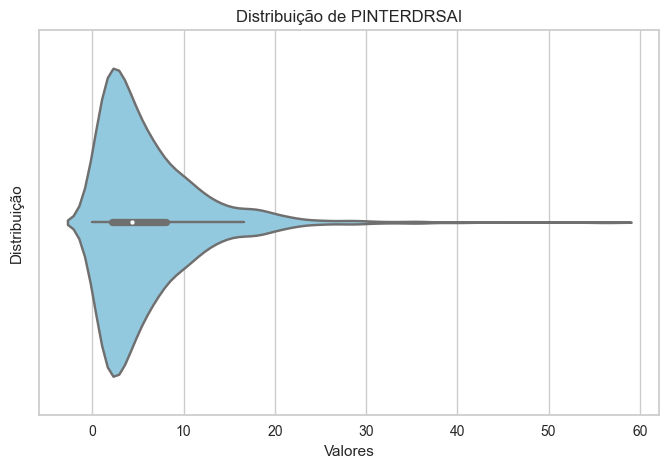

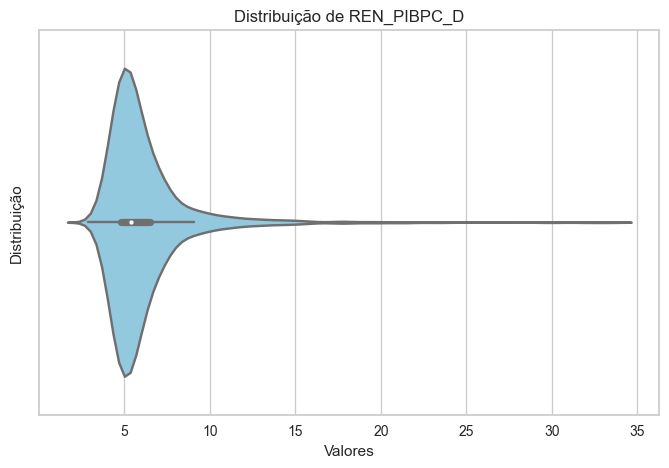

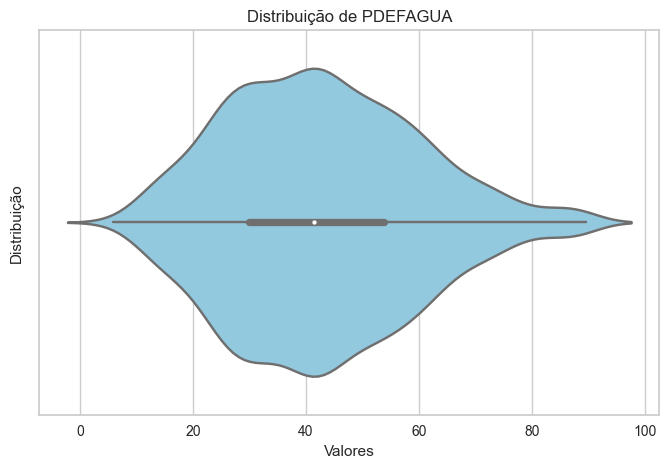

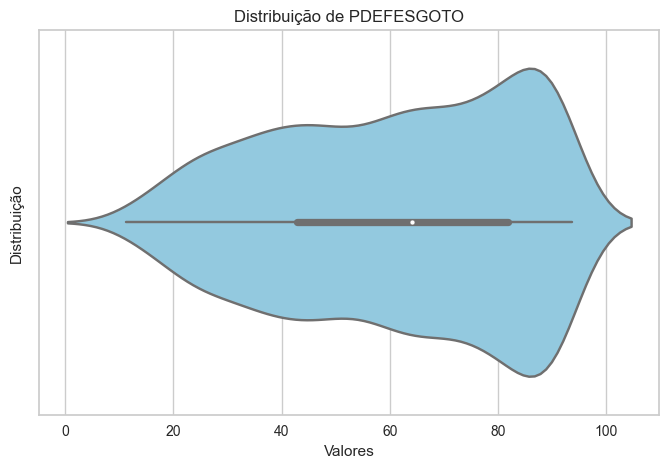

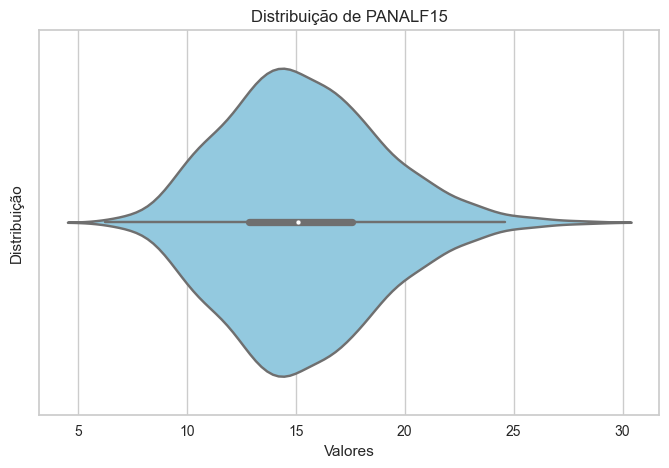

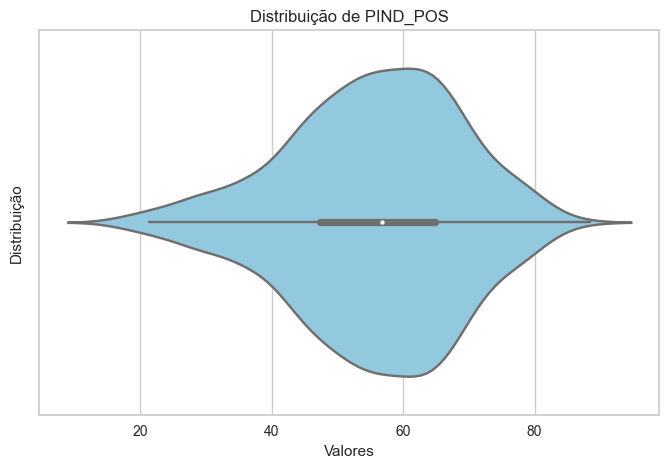

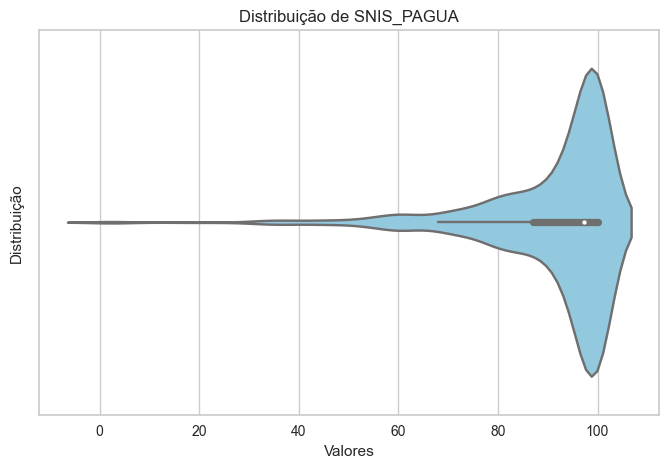

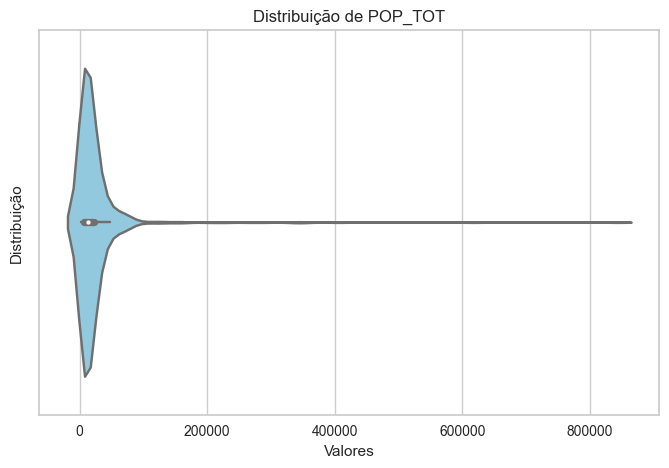

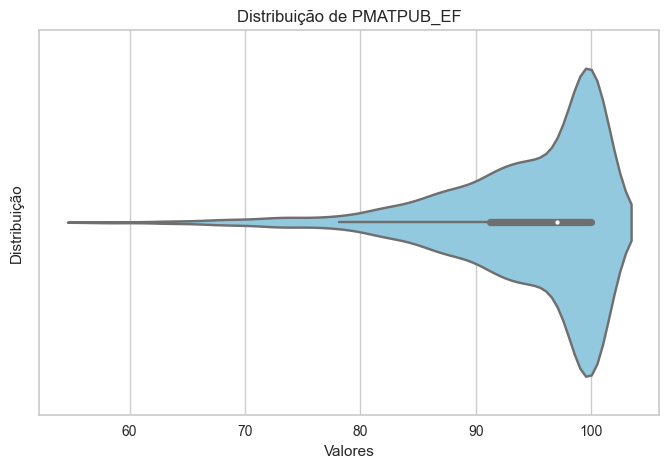

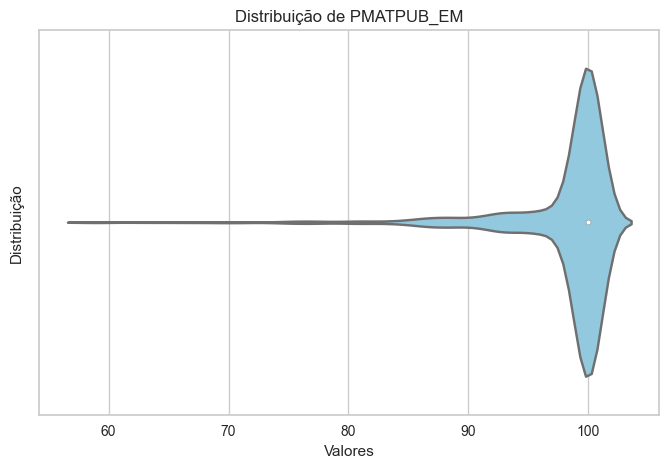

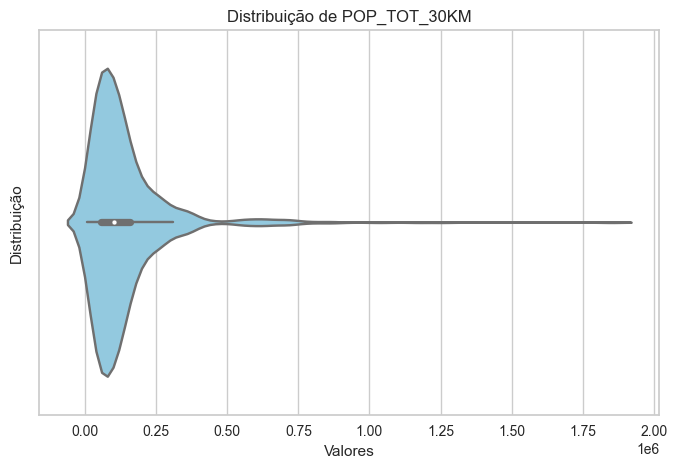

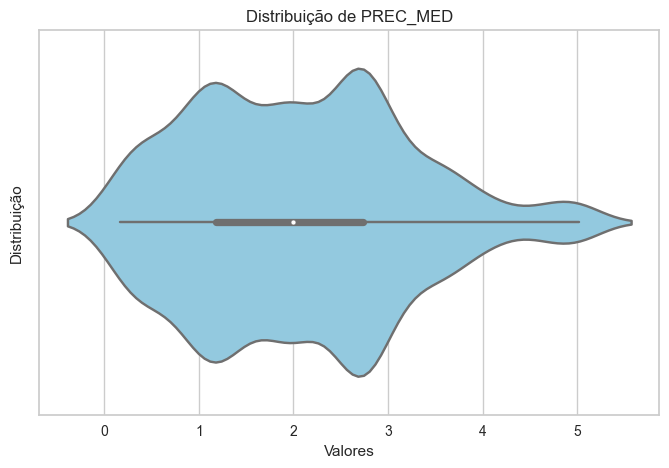

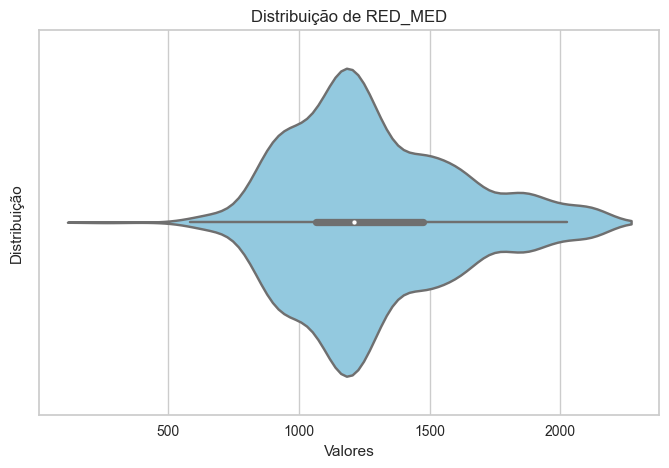

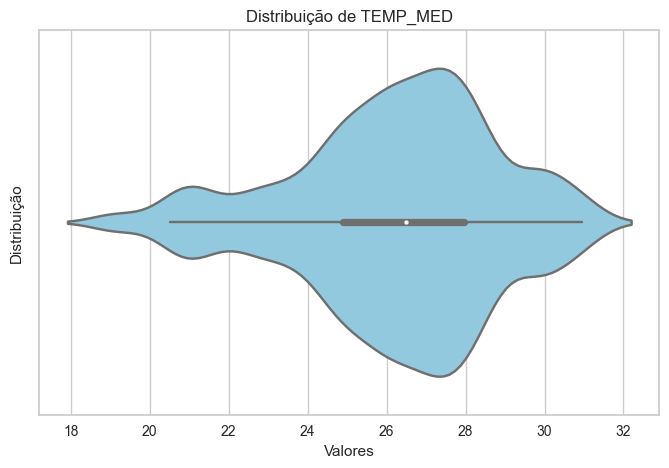

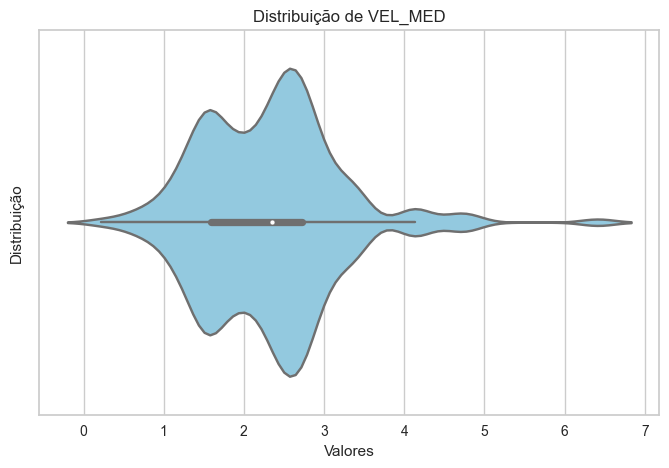

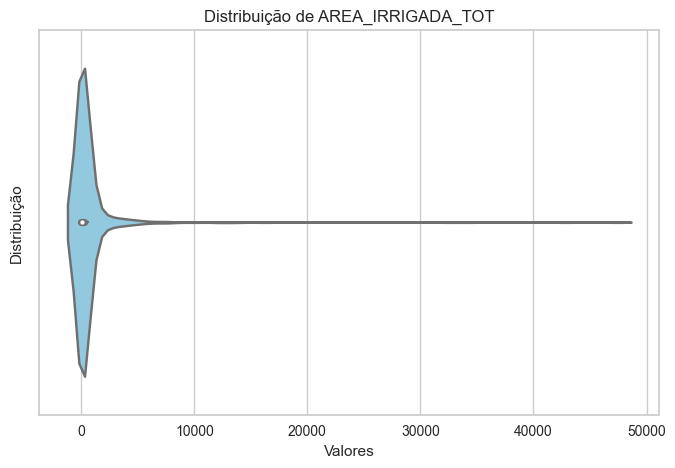

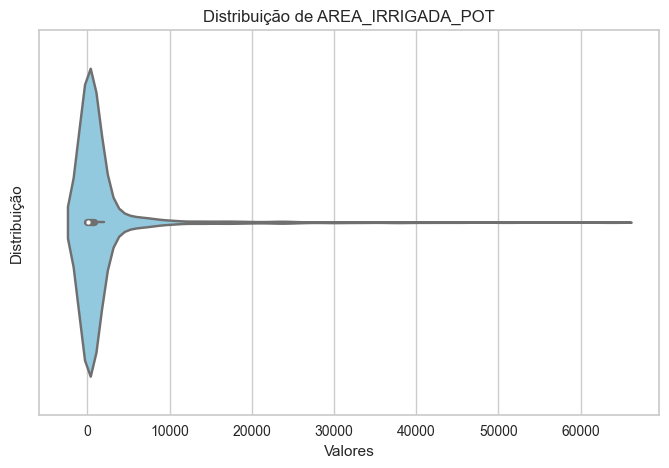

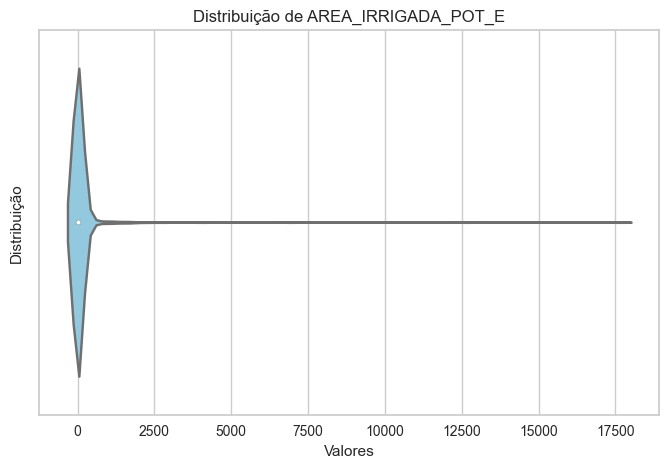

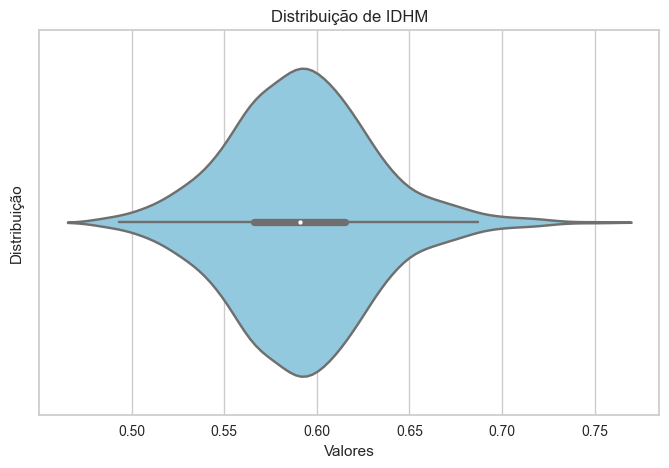

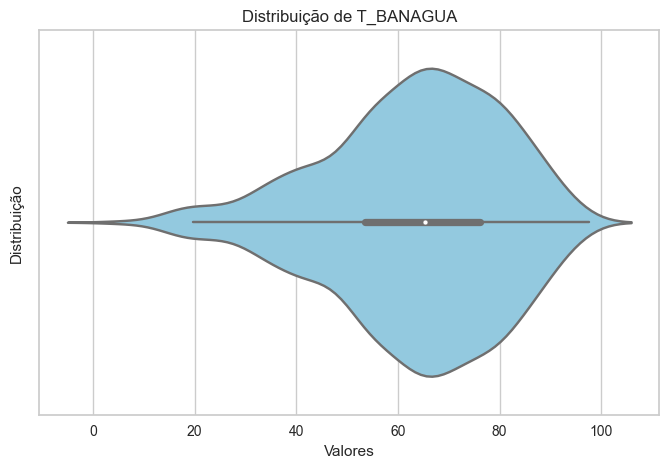

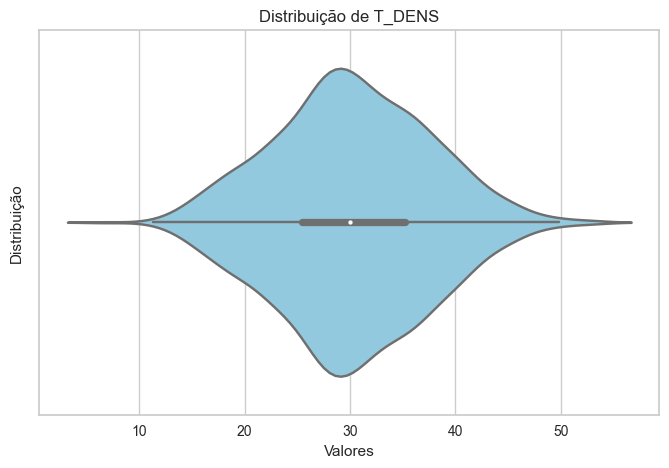

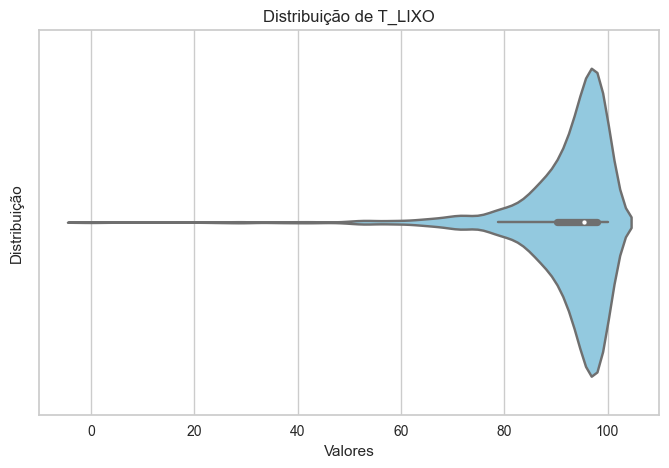

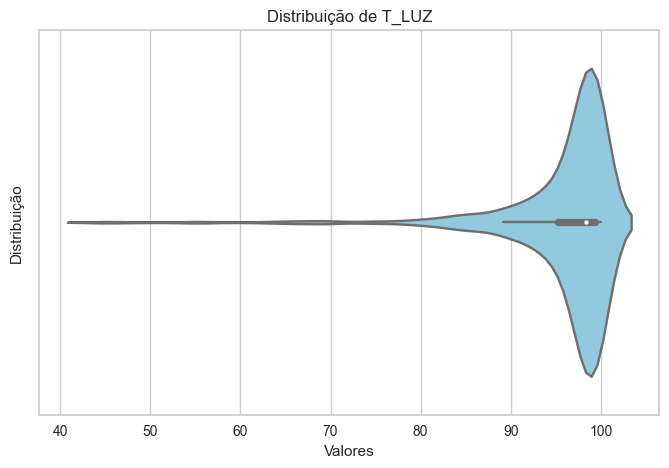

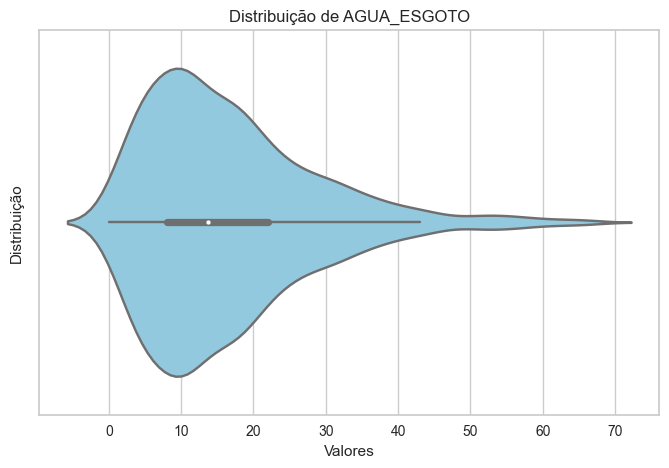

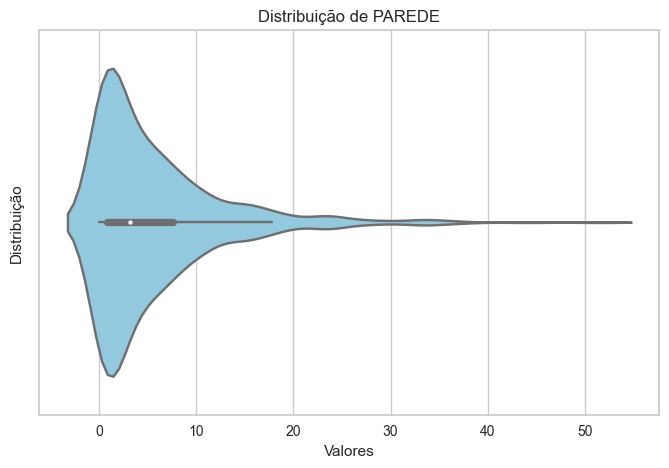

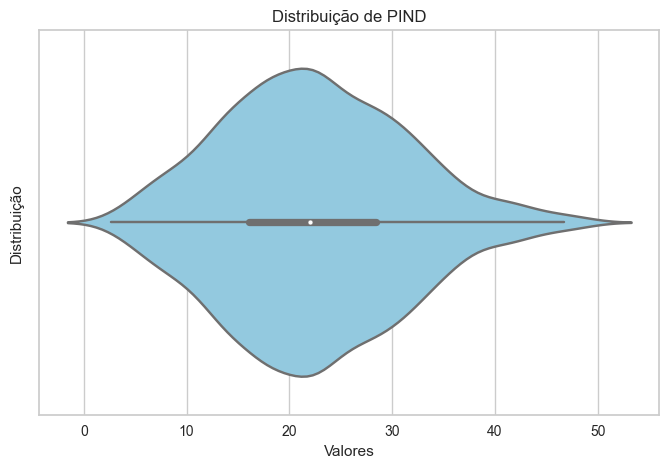

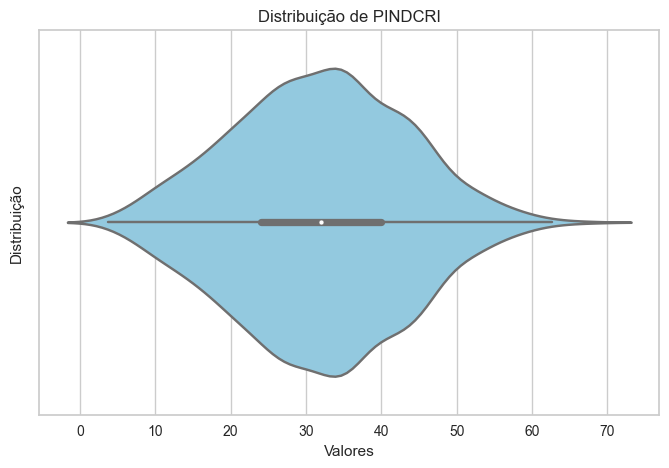

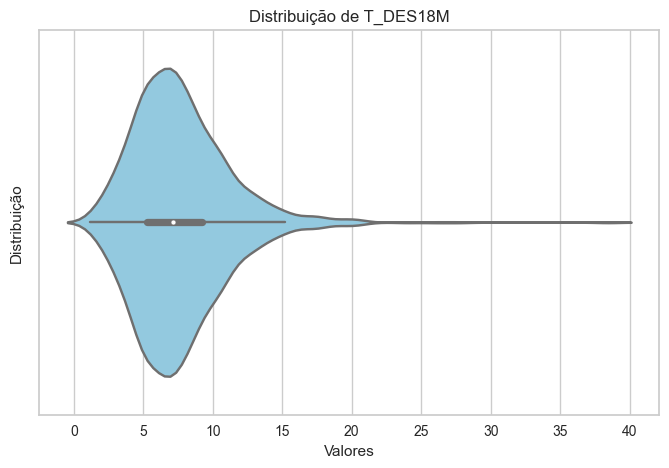

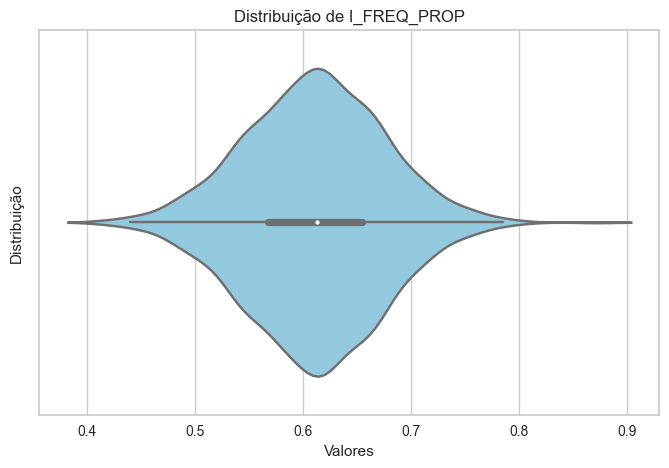

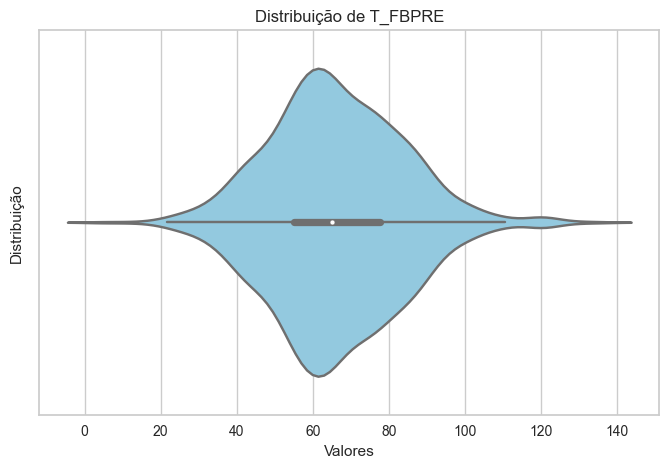

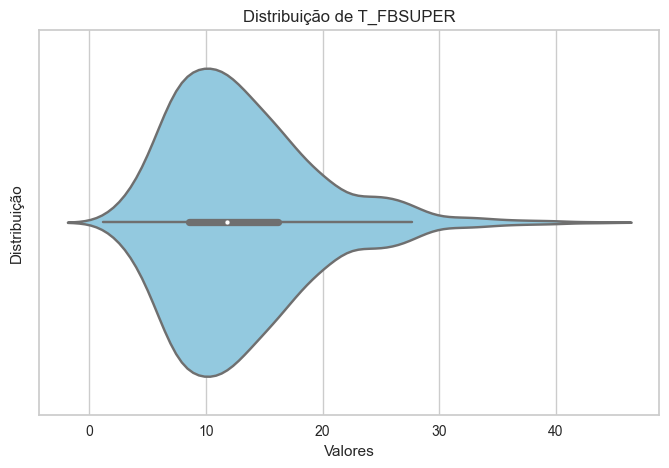

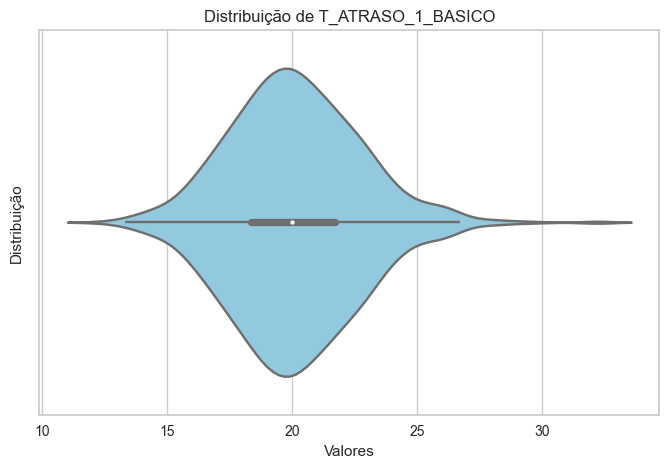

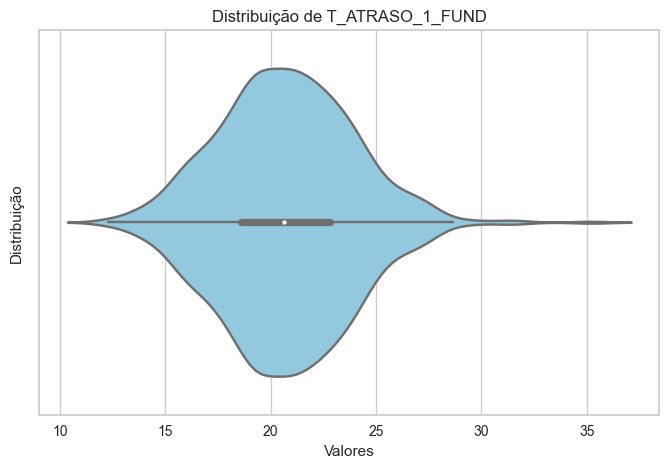

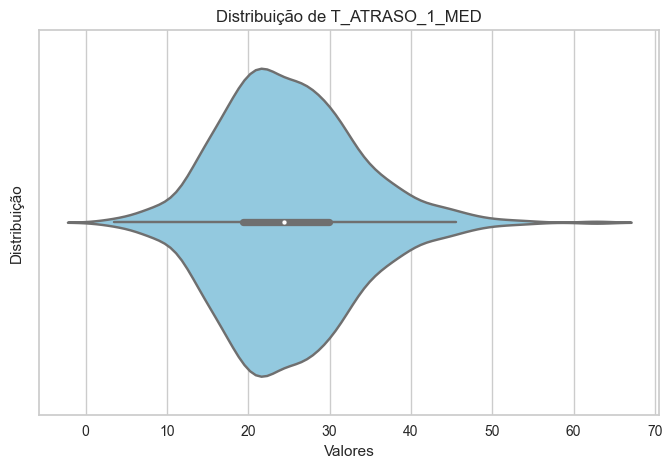

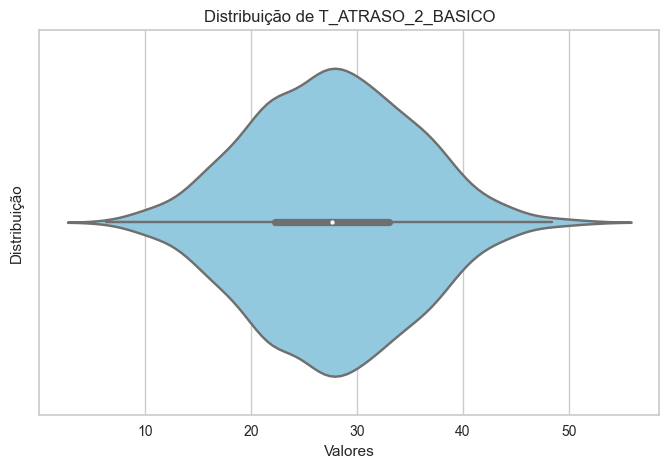

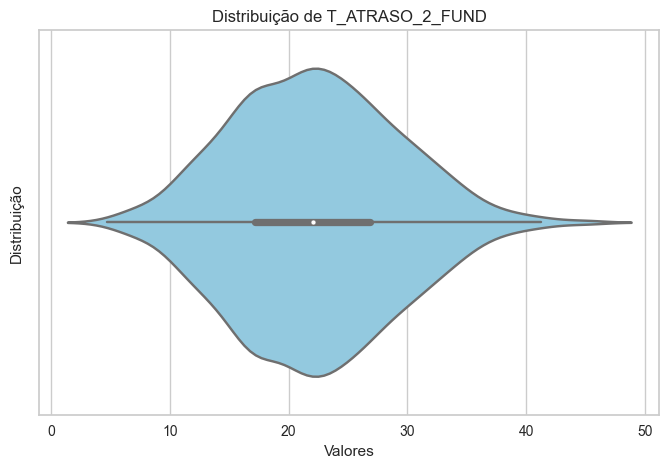

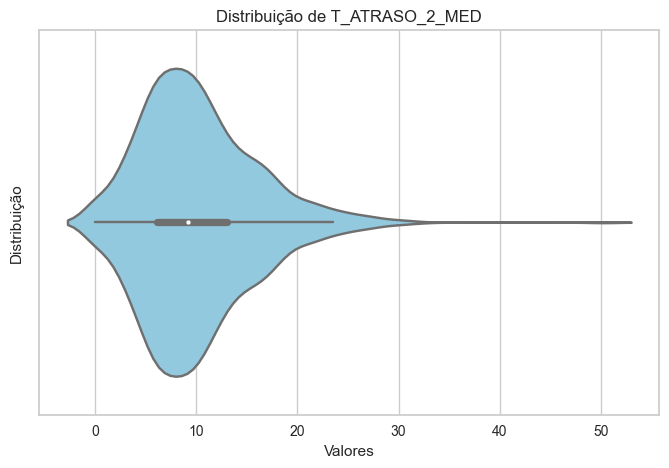

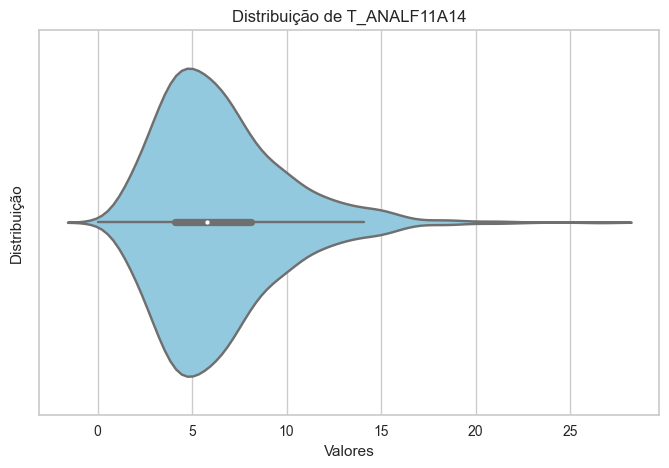

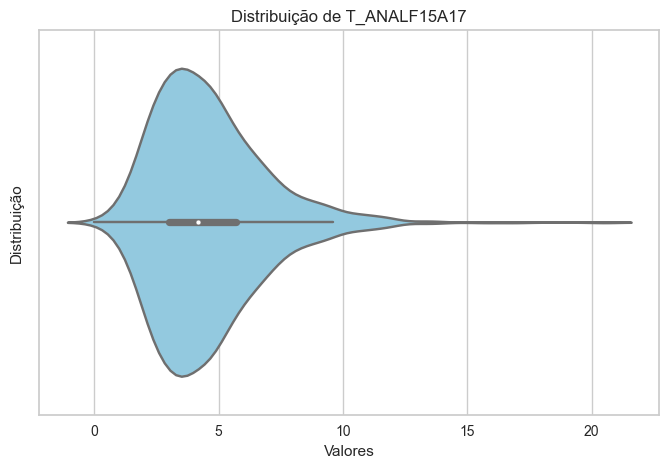

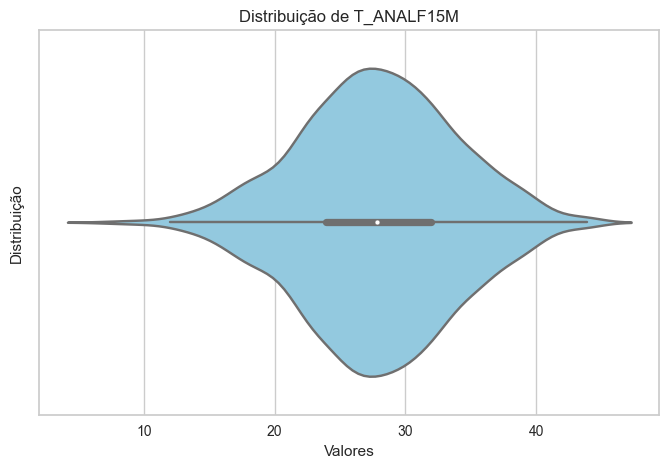

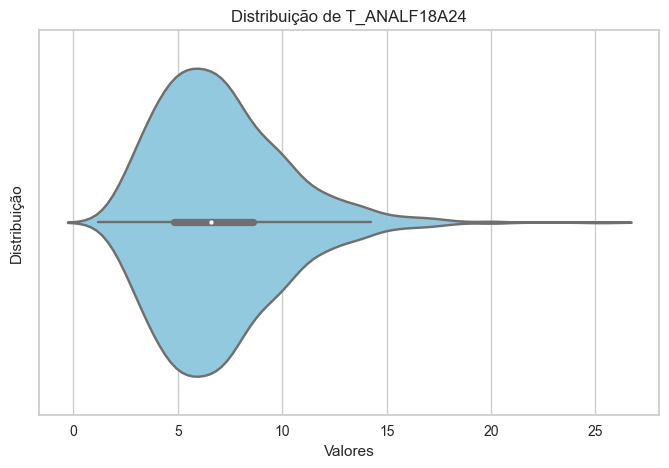

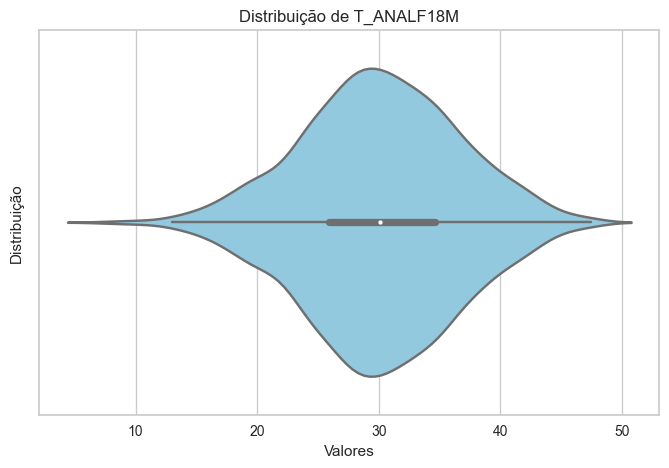

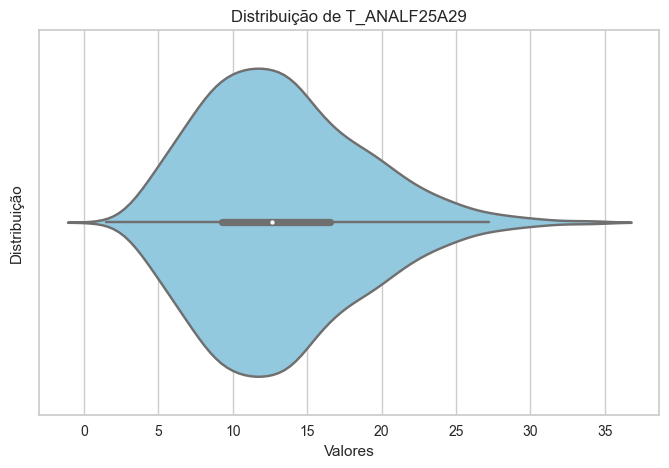

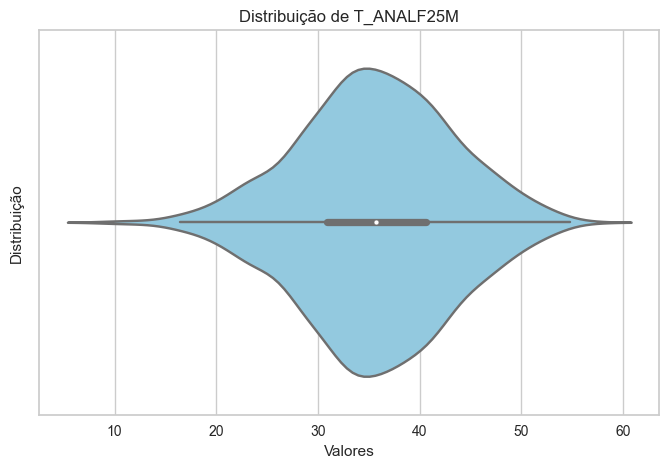

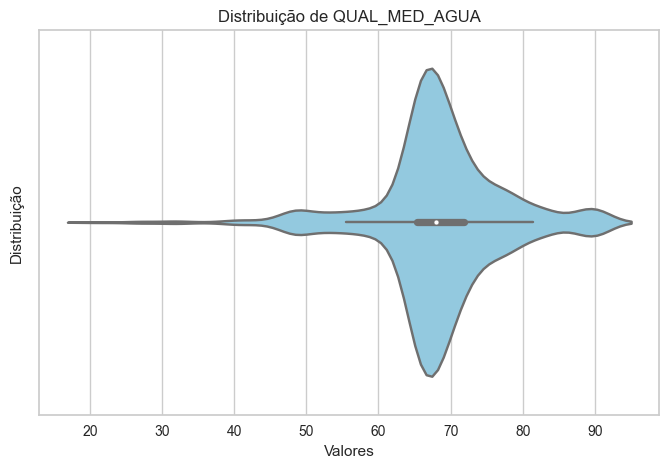

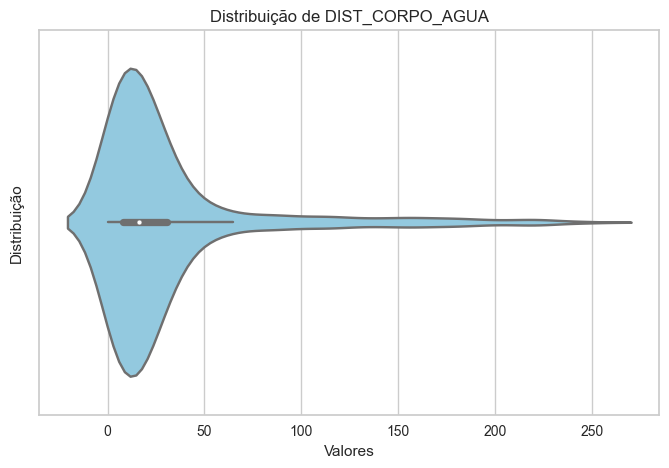

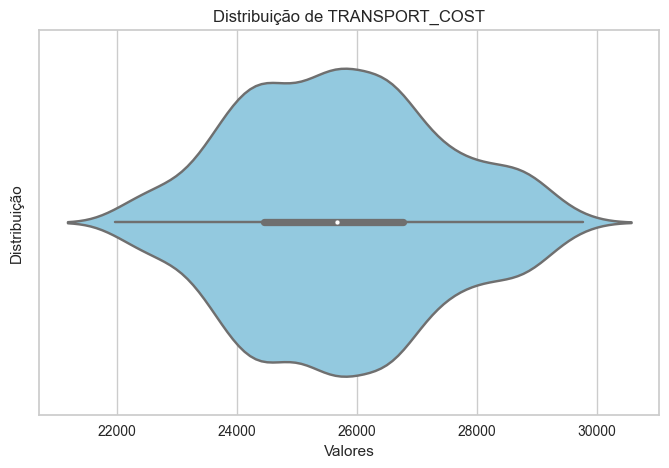

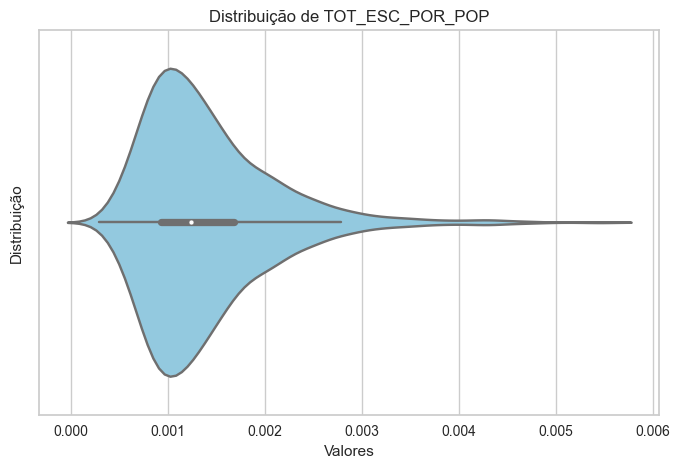

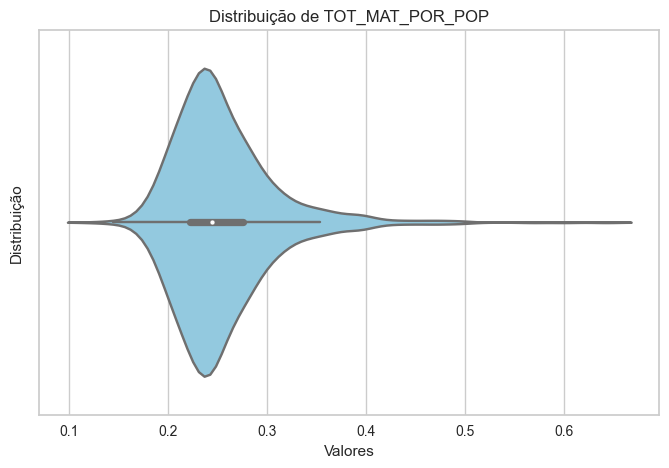

In [25]:
columns = [coluna for coluna in df.columns if (df[coluna].dtype == 'float64')&(coluna not in ['LATITUDE', 'LONGITUDE'])]

for column in columns:
    plt.figure(figsize=(8, 5))  # Ajuste o tamanho da figura conforme necessário
    sns.violinplot(x=df[column], color='skyblue')
        
    # Ajuste o nome dos eixos e o título
    plt.xlabel('Valores')  # Nome do eixo X
    plt.ylabel('Distribuição')  # Nome do eixo Y
    plt.title(f'Distribuição de {column}')  # Título do gráfico
        
    # Exiba o plot
    plt.show()

# 3) Redução da dimensinalidade e análise de cluster

## 3.1) Pré-processamento

In [26]:
df_pp = df[columns].copy()
scaler = StandardScaler()
df_pp[columns] = scaler.fit_transform(df_pp[columns])
df_pp

DIST_EF_PUB  DIST_EM_PUB   IDEB_AI   IDEB_AF  DOCSUP_EF_PUB   
0        0.019274     0.503763  0.009712 -0.139312       1.033581  \
1        0.424867    -0.321499 -0.329256 -0.348217      -1.763812   
2        0.962299     1.892552 -1.026373 -1.300040      -0.792960   
3        1.623867     0.506527 -1.036837 -0.993079       0.674700   
4        0.568233    -0.289355 -0.004927 -0.247704      -1.213439   
...           ...          ...       ...       ...            ...   
1256     0.746876     0.054702 -0.874416 -0.447579       1.721881   
1257     0.519993     1.195003 -1.306707 -1.265562       1.547797   
1258     1.165344     0.648517 -0.674314 -0.644018       1.500929   
1259     0.165434     0.978776 -0.486509 -0.473264       0.448391   
1260     1.712613     1.285563 -0.611705 -0.816491       0.921096   

      DOCSUP_EM_PUB  TXNASC7C  TXNBAIXOP  PINTERSAP  PINTERDRSAI  ...   
0          0.766143 -0.532485   1.685605  -0.685158     0.128926  ...  \
1         -0.205839 -0.964248  -0.197895   0.384794     1.067828  ...   
2         -0.859435 -1.068230   0.337592  -0.538813     0.112658  ...   
3          0.006418 -1.181960  -0.570318  -0.808078    -0.710353  ...   
4         -0.827079 -1.153605   0.413948  -1.187008    -0.779535  ...   
...             ...       ...        ...        ...          ...  ...   
1256       2.081101  0.620449  -0.459299  -1.543416    -1.037705  ...   
1257       1.375735 -0.934516   0.649853  -0.866091    -0.777173  ...   
1258       2.448668 -1.040046  -0.074669  -0.538950    -0.932730  ...   
1259       1.722594 -0.589257  -0.145297  -1.233405    -0.962682  ...   
1260       2.004740 -0.992333  -0.452858  -1.452397    -0.947076  ...   

      T_ANALF15M  T_ANALF18A24  T_ANALF18M  T_ANALF25A29  T_ANALF25M   
0      -0.907976     -0.235238   -0.926590     -0.272550   -0.933316  \
1       0.496749      0.618989    0.515141      1.356863    0.649878   
2       1.713954      1.801000    1.807141      3.170212    1.903959   
3       2.132525      2.178449    2.115863      3.142342    2.053917   
4       2.088993      2.744623    2.169890      2.802340    2.166718   
...          ...           ...         ...           ...         ...   
1256    0.104966     -0.298146    0.076756     -0.302277    0.081892   
1257    0.948806      0.268027    1.069296      0.946258    1.204593   
1258   -0.183011      0.125656   -0.185658      0.216088   -0.196793   
1259   -0.090925     -0.529913   -0.074518      0.143629   -0.030909   
1260    0.078178      0.678586    0.087561      0.541228    0.052697   

      QUAL_MED_AGUA  DIST_CORPO_AGUA  TRANSPORT_COST  TOT_ESC_POR_POP   
0         -0.672664         0.255271       -1.002499        -1.434814  \
1         -0.352958        -0.144744       -0.873426        -0.295946   
2         -0.352958        -0.635652       -0.891589         1.243402   
3         -0.352958         0.634906       -0.812719        -0.441093   
4         -0.175071         0.874114       -0.586924         0.940590   
...             ...              ...             ...              ...   
1256      -0.396479        -0.679552       -1.092806        -1.049752   
1257      -0.396479        -0.331810       -1.054900         1.309899   
1258      -0.376727        -0.649722       -1.076557        -0.431907   
1259      -0.436431        -0.612629       -1.105931         0.208227   
1260      -4.084304        -0.676859       -1.178079        -1.003811   

      TOT_MAT_POR_POP  
0           -0.182990  
1            2.487378  
2            0.825341  
3            3.156894  
4            2.142748  
...               ...  
1256        -0.837367  
1257        -1.127809  
1258        -0.000727  
1259        -0.615608  
1260        -0.381380  

[1261 rows x 58 columns]

## 3.2) Aplicação do PCA

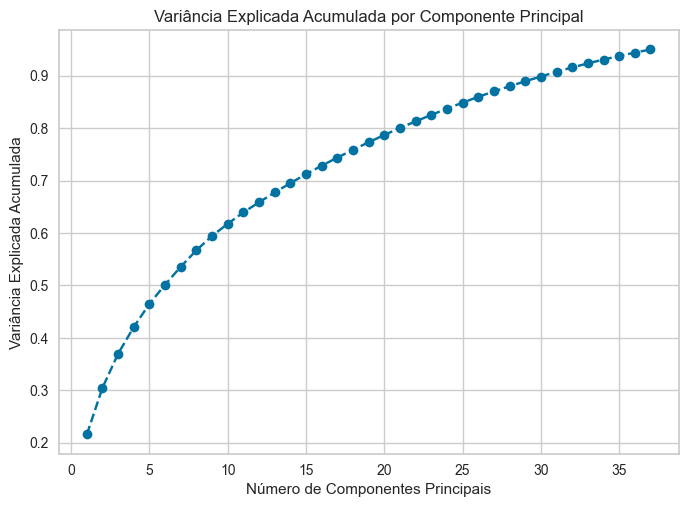

In [27]:
# Aplicar o PCA
pca = PCA(n_components = 0.95)
df_pp = pca.fit_transform(df_pp)

# Calcular a variância explicada para cada componente principal
variancia_explicada = pca.explained_variance_ratio_

# Plotar a variância explicada acumulada
variancia_acumulada = np.cumsum(variancia_explicada)
plt.plot(range(1, len(variancia_acumulada) + 1), variancia_acumulada, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada por Componente Principal')
plt.show()

## 3.3) Análise de cluster

In [28]:
tsne = TSNE(n_components=2, random_state=42)
df_components = tsne.fit_transform(df_pp)
df_components = pd.DataFrame(df_components)
df_components.columns = ['COMPONENT1', 'COMPONENT2']

def plot(df, df_components, clusters):
    df = pd.concat([df, df_components], axis = 1)
    df['CLUSTER'] = clusters

    actual_cities = df[['NOME', 'COMPONENT1', 'COMPONENT2', 'CLUSTER']].loc[df['NOME'].isin(['MAURITI', 'SÃO JOSÉ DA TAPERA', 'BUÍQUE', 'INAJÁ'])]

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='COMPONENT1', y='COMPONENT2', hue='CLUSTER', palette='Set2')
    sns.scatterplot(data=actual_cities, x='COMPONENT1', y='COMPONENT2', marker = 'X', color='black', s=100, label='Cidades atuais')
    for i, row in actual_cities.iterrows():
        plt.text(row['COMPONENT1'] + 0.1, row['COMPONENT2'], row['NOME'], fontsize=12)
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.title('Visualização dos Clusters')
    plt.legend(title='Cluster', loc='upper right')
    plt.grid(True)
    plt.show()

### 3.3.1) Hierarchical Clustering

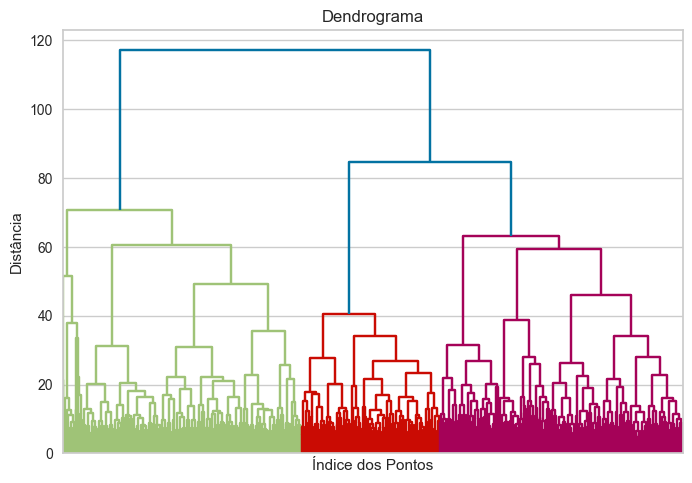

In [29]:
linkage_matrix = linkage(df_pp, method='ward')

plt.figure()
dendrogram(linkage_matrix)
plt.title('Dendrograma')
plt.xticks([])
plt.xlabel('Índice dos Pontos')
plt.ylabel('Distância')
plt.show()

Silhouette Score:  0.0897
Davies-Bouldin Score:  2.8054
Calinski-Harabasz Index:  137.6308


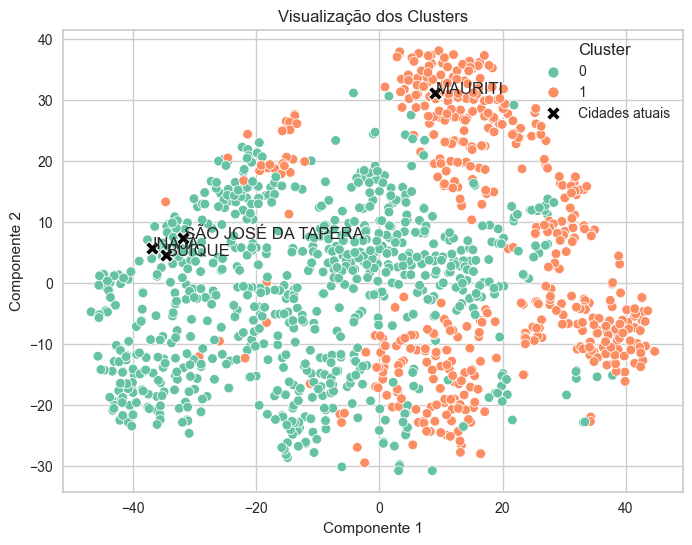

In [30]:
hclustering = AgglomerativeClustering(n_clusters=2)
h_clusters = hclustering.fit_predict(df_pp)
print('Silhouette Score: ',round(silhouette_score(df_pp, h_clusters),4))
print('Davies-Bouldin Score: ',round(davies_bouldin_score(df_pp, h_clusters),4))
print('Calinski-Harabasz Index: ',round(calinski_harabasz_score(df_pp, h_clusters),4))
plot(df, df_components, h_clusters)

### 3.3.2) K-Means

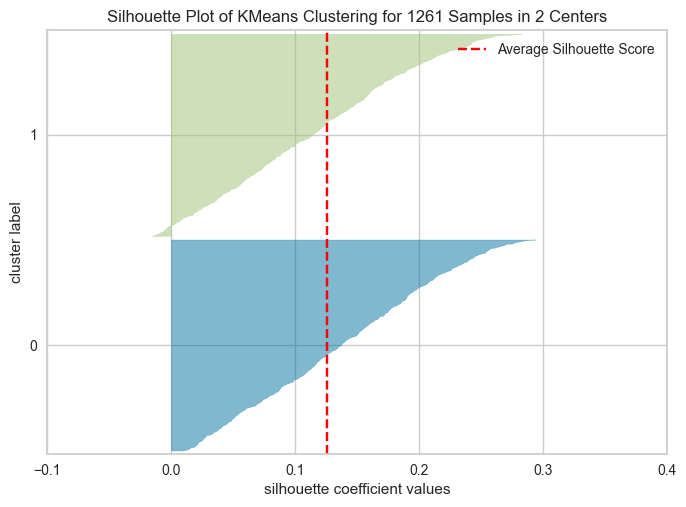

In [31]:
best_score = -1  
best_n_clusters = 0  
for n_clusters in range(2,13):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df_pp)
    score = silhouette_score(df_pp, clusters)
    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters
        
silhouette_visualizer(KMeans(best_n_clusters, random_state=42), df_pp, colors='yellowbrick')
plt.show()

Silhouette Score:  0.126
Davies-Bouldin Score:  2.3656
Calinski-Harabasz Index:  207.4499


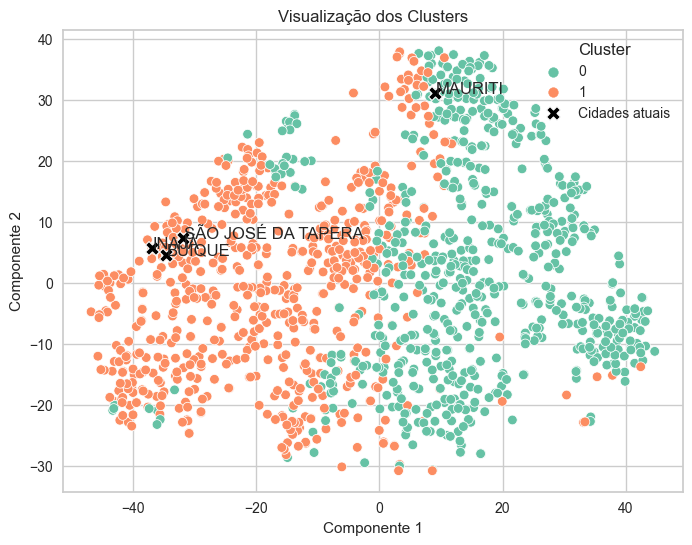

In [32]:
kmeans = KMeans(2, random_state = 42)
k_clusters = kmeans.fit_predict(df_pp)
print('Silhouette Score: ',round(silhouette_score(df_pp, k_clusters),4))
print('Davies-Bouldin Score: ',round(davies_bouldin_score(df_pp, k_clusters),4))
print('Calinski-Harabasz Index: ',round(calinski_harabasz_score(df_pp, k_clusters),4))
plot(df, df_components, k_clusters)

## 3.4) Seleção das melhores features

In [46]:
X = df[columns]
y = k_clusters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)
boruta = BorutaPy(rf_model, n_estimators='auto', verbose=False, random_state=42)
boruta.fit(X_train.values, y_train)
mask_columns_selected = boruta.support_.tolist()
df_pp = X.iloc[:, mask_columns_selected]
columns_selected = df_pp.columns
columns_selected

Index(['DIST_EF_PUB', 'DIST_EM_PUB', 'IDEB_AI', 'IDEB_AF', 'DOCSUP_EF_PUB',
       'DOCSUP_EM_PUB', 'TXNASC7C', 'REN_PIBPC_D', 'PDEFAGUA', 'PDEFESGOTO',
       'PANALF15', 'PIND_POS', 'PMATPUB_EF', 'POP_TOT_30KM', 'IDHM',
       'T_BANAGUA', 'T_DENS', 'T_LUZ', 'AGUA_ESGOTO', 'PIND', 'PINDCRI',
       'I_FREQ_PROP', 'T_ATRASO_1_BASICO', 'T_ATRASO_1_FUND', 'T_ATRASO_1_MED',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_ATRASO_2_MED',
       'T_ANALF11A14', 'T_ANALF15A17', 'T_ANALF15M', 'T_ANALF18A24',
       'T_ANALF18M', 'T_ANALF25A29', 'T_ANALF25M', 'DIST_CORPO_AGUA',
       'TRANSPORT_COST', 'TOT_ESC_POR_POP'],
      dtype='object')

## 3.5) Nova aplicação do PCA

In [54]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pp)

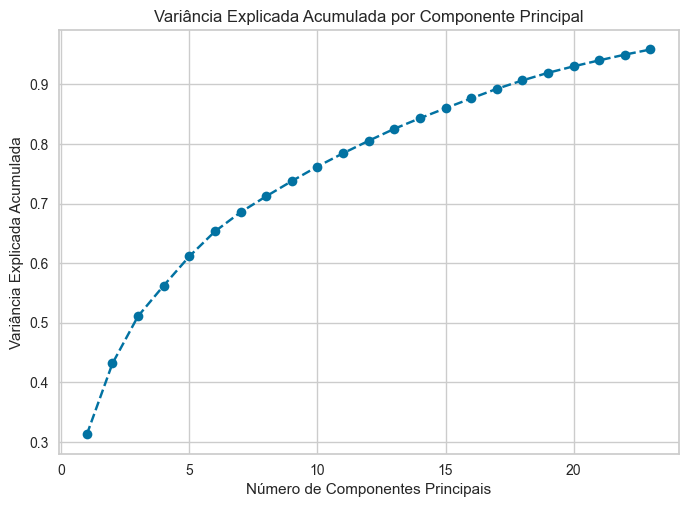

In [55]:

pca = PCA(n_components=0.95)
df_pp = pca.fit_transform(df_scaled)

# Calcular a variância explicada para cada componente principal
variancia_explicada = pca.explained_variance_ratio_

# Plotar a variância explicada acumulada
variancia_acumulada = np.cumsum(variancia_explicada)
plt.plot(range(1, len(variancia_acumulada) + 1), variancia_acumulada, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada por Componente Principal')
plt.show()

## 3.6) Nova análise de cluster

### 3.6.1) Hierachical Clustering

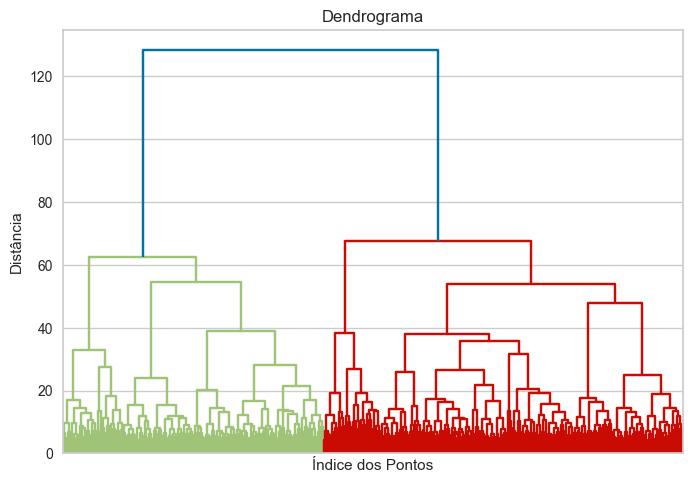

In [56]:
linkage_matrix = linkage(df_pp, method='ward')

plt.figure()
dendrogram(linkage_matrix)
plt.title('Dendrograma')
plt.xticks([])
plt.xlabel('Índice dos Pontos')
plt.ylabel('Distância')
plt.show()

Silhouette Score:  0.1481
Davies-Bouldin Score:  2.0323
Calinski-Harabasz Index:  274.881


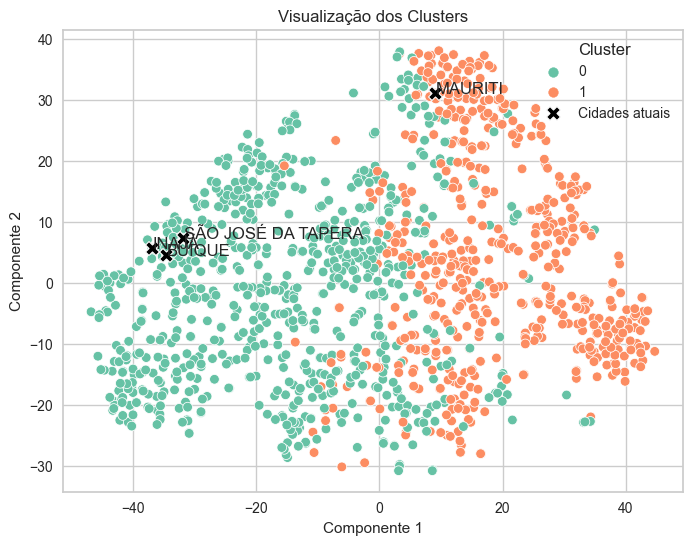

In [57]:
hclustering = AgglomerativeClustering(n_clusters=2)
h_clusters = hclustering.fit_predict(df_pp)
print('Silhouette Score: ',round(silhouette_score(df_pp, h_clusters),4))
print('Davies-Bouldin Score: ',round(davies_bouldin_score(df_pp, h_clusters),4))
print('Calinski-Harabasz Index: ',round(calinski_harabasz_score(df_pp, h_clusters),4))
plot(df, df_components, h_clusters)

### 3.6.2) K-Means

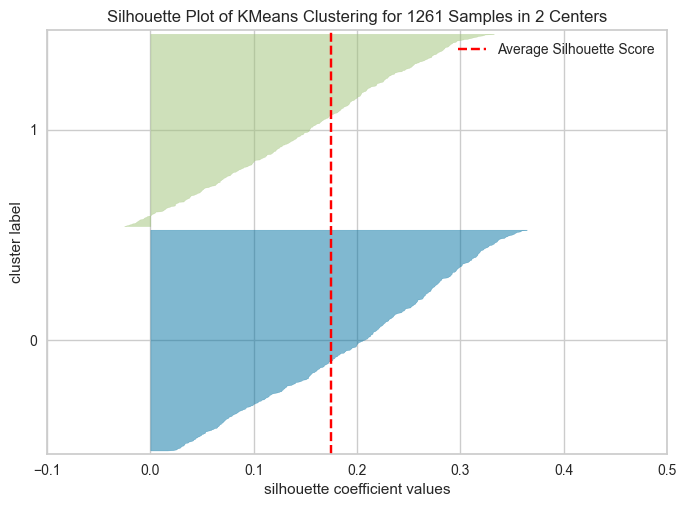

In [58]:
best_score = -1  
best_n_clusters = 0  
for n_clusters in range(2,13):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df_pp)
    score = silhouette_score(df_pp, clusters)
    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters
        
silhouette_visualizer(KMeans(best_n_clusters, random_state=42), df_pp, colors='yellowbrick')
plt.show()

Silhouette Score:  0.1101
Davies-Bouldin Score:  2.1385
Calinski-Harabasz Index:  195.4266


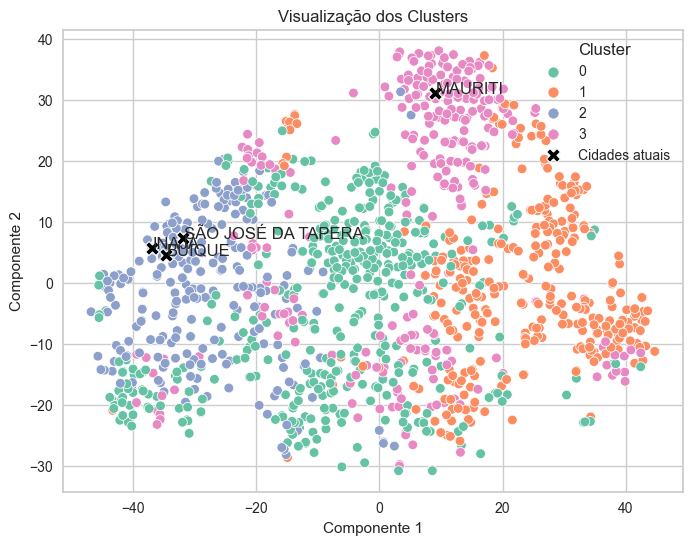

In [65]:
kmeans = KMeans(4, random_state = 42)
k_clusters = kmeans.fit_predict(df_pp)
print('Silhouette Score: ',round(silhouette_score(df_pp, k_clusters),4))
print('Davies-Bouldin Score: ',round(davies_bouldin_score(df_pp, k_clusters),4))
print('Calinski-Harabasz Index: ',round(calinski_harabasz_score(df_pp, k_clusters),4))
plot(df, df_components, k_clusters)

## 3.4) Seleção dos municípios com maior potencial

### 3.4.1) Interpretação dos clusters

In [66]:
df['CLUSTER'] = k_clusters
df[['CLUSTER','IDHM','POP_TOT', 'POP_TOT_30KM', 'AREA_IRRIGADA_POT_E','REN_PIBPC_D']].groupby('CLUSTER').mean()

IDHM       POP_TOT   POP_TOT_30KM  AREA_IRRIGADA_POT_E   
CLUSTER                                                               
0        0.582526  16017.198621  112179.439080           105.434402  \
1        0.633926  39998.624437  173517.544695           133.055254   
2        0.545594  12991.811111  126485.817094             4.679547   
3        0.597057  18227.723132  134852.198577            54.576200   

         REN_PIBPC_D  
CLUSTER               
0           5.968038  
1           7.680426  
2           5.236988  
3           5.337466

### 3.4.1) Interpretação dos municípios atuais

In [67]:
actual_cities = df[
    ['NOME', 'UF', 'IDHM','POP_TOT', 'POP_TOT_30KM','AREA_IRRIGADA_POT_E', 'TRANSPORT_COST','REN_PIBPC_D', 'CLUSTER']
].loc[df['NOME'].isin(['MAURITI', 'SÃO JOSÉ DA TAPERA', 'BUÍQUE', 'INAJÁ'])]

actual_cities

NOME  UF   IDHM  POP_TOT  POP_TOT_30KM   
34   SÃO JOSÉ DA TAPERA  AL  0.527  32258.8      225558.2  \
418             MAURITI  CE  0.605  46103.4      207315.4   
796              BUÍQUE  PE  0.527  56502.4      234399.4   
827               INAJÁ  PE  0.523  21917.0       89734.8   

     AREA_IRRIGADA_POT_E  TRANSPORT_COST  REN_PIBPC_D  CLUSTER  
34              0.000000    24412.742090     5.271752        2  
418            42.459601    26126.391541     5.323949        3  
796             0.000000    24856.786124     4.514648        2  
827             0.000000    24941.784481     4.481543        2

### 3.4.1) Seleção dos municipios de maior potencial

In [68]:
potential_muns = df.copy()

potential_muns = potential_muns[
    ['IBGE7','NOME', 'UF','IDHM','POP_TOT', 'POP_TOT_30KM', 'AREA_IRRIGADA_POT_E','TRANSPORT_COST', 'REN_PIBPC_D']
].loc[
    (potential_muns['CLUSTER'] == 2)&
    (potential_muns['TRANSPORT_COST'] <= 26126)&
    (potential_muns['POP_TOT'] >= 21917)&
    (potential_muns['POP_TOT_30KM'] >= 89734)&
    ~(potential_muns['NOME'].isin(['MAURITI', 'SÃO JOSÉ DA TAPERA', 'BUÍQUE', 'INAJÁ']))
].sort_values(by='IDHM').reset_index().drop(columns='index')

potential_muns

IBGE7                    NOME  UF   IDHM  POP_TOT  POP_TOT_30KM   
0   2916500               ITAPICURU  BA  0.486  35881.0      197766.2  \
1   2705002             MATA GRANDE  AL  0.504  25555.2      129923.6   
2   2921500             MONTE SANTO  BA  0.506  53678.4      107356.8   
3   2607505                  ITAÍBA  PE  0.510  26440.2      129160.2   
4   2615805             TUPANATINGA  PE  0.519  26445.0      135832.6   
5   2603207                  CAETÉS  PE  0.522  28139.2      275058.0   
6   2702355                 CRAÍBAS  AL  0.525  24250.4      452771.8   
7   2600500             ÁGUAS BELAS  PE  0.526  42556.6      120915.8   
8   2805406            POÇO REDONDO  SE  0.529  33748.0      160430.8   
9   2709202                  TRAIPU  AL  0.532  27788.4      125736.2   
10  2902104                   ARACI  BA  0.534  55924.0      150818.4   
11  2702900       GIRAU DO PONCIANO  AL  0.536  40493.4      369830.2   
12  2603702              CANHOTINHO  PE  0.541  24838.6      156462.2   
13  2923100                OLINDINA  BA  0.559  27258.6      137778.0   
14  2602605  BREJO DA MADRE DE DEUS  PE  0.562  49073.4      341514.6   
15  2602100            BOM CONSELHO  PE  0.563  47751.6      279757.4   
16  2703106                   IGACI  AL  0.564  26041.0      410469.0   
17  2610806                   PEDRA  PE  0.567  22105.6      205759.6   
18  2805604          PORTO DA FOLHA  SE  0.568  28489.0      105359.0   
19  2500304           ALAGOA GRANDE  PB  0.582  28647.4      387187.6   
20  2707107                PIRANHAS  AL  0.589  24938.6      121184.0   
21  2708006      SANTANA DO IPANEMA  AL  0.591  47806.0      254574.4   

    AREA_IRRIGADA_POT_E  TRANSPORT_COST  REN_PIBPC_D  
0             23.347661    23766.055025     6.849795  
1              0.000000    24784.146031     4.449701  
2            156.631138    24661.745267     4.328636  
3              0.000000    24766.124221     4.976593  
4              0.000000    24850.504059     4.388692  
5              0.000000    24577.226408     4.815525  
6              0.000000    24157.623963     5.158251  
7              0.000000    24567.583714     5.165439  
8              0.000000    24384.862047     5.892361  
9              0.000000    24050.952763     4.451462  
10            75.972864    24039.136087     5.084188  
11             0.000000    24031.204758     4.785359  
12             0.000000    24372.524749     5.369634  
13             2.014705    23786.657227     4.926996  
14             0.000000    24846.196361     4.828221  
15             0.000000    24379.135016     6.433896  
16             0.000000    24155.077136     4.688581  
17             0.000000    24847.763111     5.989407  
18             0.000000    24177.579577     6.440439  
19             0.000000    25226.202211     6.074781  
20             0.000000    24512.712911     5.359121  
21             0.000000    24468.230771     7.197231

In [69]:
final_df = df[df['IBGE7'].isin(potential_muns['IBGE7'])].sort_values(by='IDHM').reset_index().drop(columns='index')
final_df.to_csv('../Dados/Tabela_final/municipios_potenciais.csv')